## Connect with the DB



Gráfico de performance normalizada salvo como 'performance_normalizada.png'


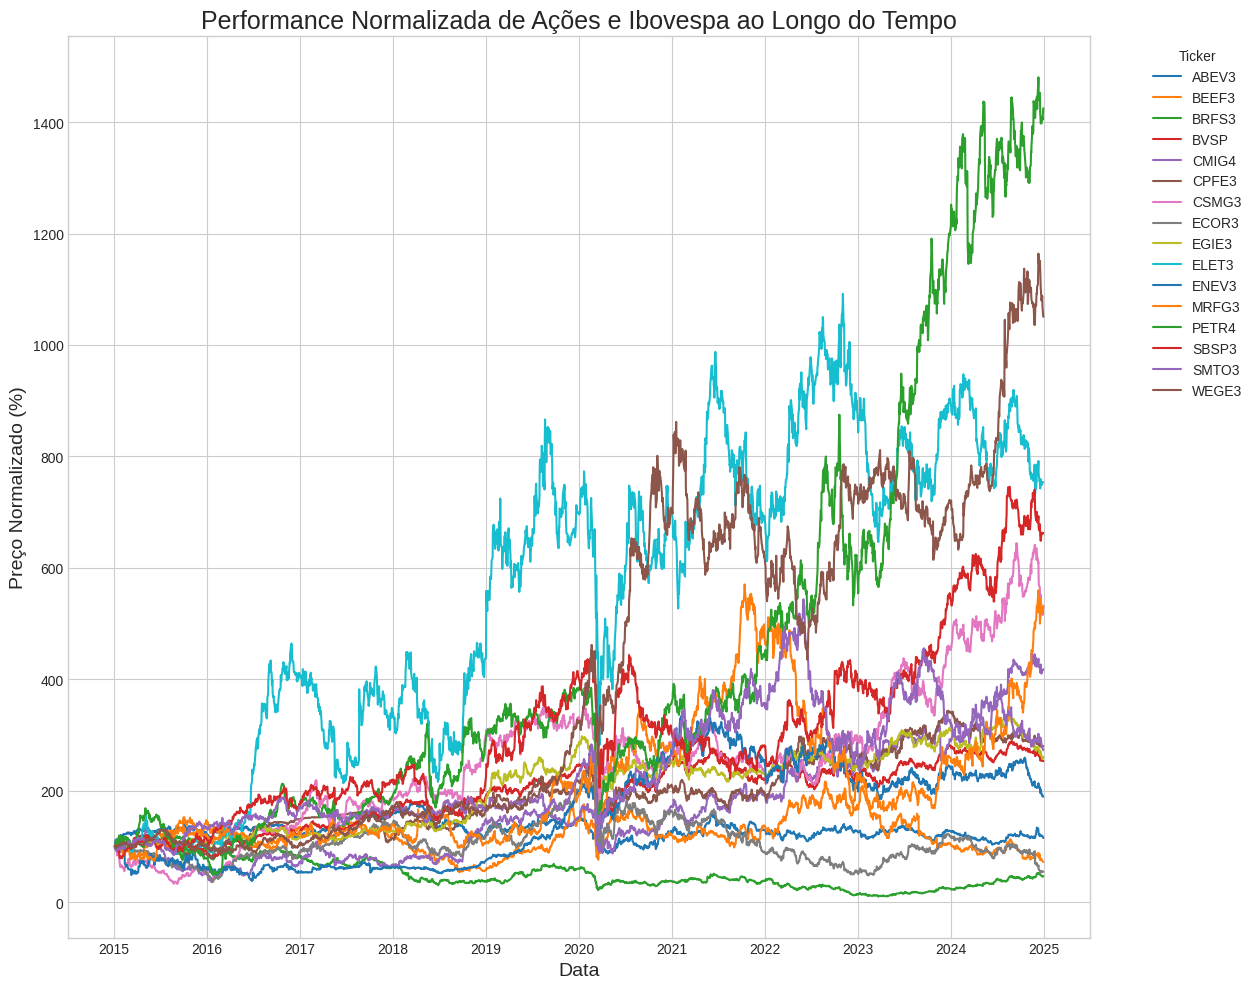

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os
import re

# Credenciais do banco de dados (ajuste se necessário)
DB_USER = "user_invest"
DB_PASSWORD = "senha_forte"
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'postgres'
TABLE_NAME = 'companys'

try:
    # Cria a URL de conexão
    db_url = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
    engine = create_engine(db_url)

    # Lista de tickers para análise, incluindo o Ibovespa
    tickers_list = ["PETR4.SA", "ELET3.SA", "EGIE3.SA", "CPFE3.SA", "CMIG4.SA", "ENEV3.SA",
                    "JBSS3.SA", "BRFS3.SA", "MRFG3.SA", "BEEF3.SA", "SMTO3.SA", "ABEV3.SA",
                    "CCRO3.SA", "ECOR3.SA", "SBSP3.SA", "CSMG3.SA", "WEGE3.SA", "^BVSP"]
    
    # Consulta SQL para buscar os dados de 'Fechamento'
    query = f"""
    SELECT data, ticker, "Fechamento" 
    FROM {TABLE_NAME} 
    WHERE ticker IN ({', '.join([f"'{t}'" for t in tickers_list])}) 
    ORDER BY data;
    """

    # Carrega os dados do banco para um DataFrame
    df = pd.read_sql(query, engine)

    # Normaliza os nomes dos tickers para o gráfico
    df['ticker'] = df['ticker'].apply(lambda x: re.sub(r'(\.SA)$', '', x).replace('^', ''))
    
    # Reorganiza o DataFrame para que cada ticker seja uma coluna
    df_pivot = df.pivot_table(index='data', columns='ticker', values='Fechamento')

    # Normaliza os dados para que todos comecem em 100%
    df_normalized = df_pivot.div(df_pivot.iloc[0]) * 100

    # Cria o gráfico de linhas
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(15, 10))

    # Plota cada linha no gráfico
    for column in df_normalized.columns:
        plt.plot(df_normalized.index, df_normalized[column], label=column)

    plt.title('Performance Normalizada de Ações e Ibovespa ao Longo do Tempo', fontsize=18)
    plt.xlabel('Data', fontsize=14)
    plt.ylabel('Preço Normalizado (%)', fontsize=14)
    plt.legend(title='Ticker', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    # Salva o gráfico em um arquivo
    plot_filename = 'performance_normalizada.png'
    plt.savefig(plot_filename)
    print(f"Gráfico de performance normalizada salvo como '{plot_filename}'")
    
except Exception as e:
    print(f"Ocorreu um erro: {e}")

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os
import re
import plotly.express as px

# Credenciais do banco de dados (ajuste se necessário)
DB_USER = "user_invest"
DB_PASSWORD = "senha_forte"
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'postgres'
TABLE_NAME = 'companys'

try:
    # Cria a URL de conexão
    db_url = f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
    engine = create_engine(db_url)

    # Lista de tickers para análise, incluindo o Ibovespa
    tickers_list = ["PETR4.SA", "ELET3.SA", "EGIE3.SA", "CPFE3.SA", "CMIG4.SA", "ENEV3.SA",
                    "JBSS3.SA", "BRFS3.SA", "MRFG3.SA", "BEEF3.SA", "SMTO3.SA", "ABEV3.SA",
                    "CCRO3.SA", "ECOR3.SA", "SBSP3.SA", "CSMG3.SA", "WEGE3.SA", "^BVSP"]
    
    # Consulta SQL para buscar os dados de 'Fechamento'
    query = f"""
    SELECT data, ticker, "Fechamento" 
    FROM {TABLE_NAME} 
    WHERE ticker IN ({', '.join([f"'{t}'" for t in tickers_list])}) 
    ORDER BY data;
    """

    # Carrega os dados do banco para um DataFrame
    df = pd.read_sql(query, engine)

    # Normaliza os nomes dos tickers para o gráfico
    df['ticker'] = df['ticker'].apply(lambda x: re.sub(r'(\.SA)$', '', x).replace('^', ''))

    # Reorganiza o DataFrame para que cada ticker seja uma coluna
    df_pivot = df.pivot_table(index='data', columns='ticker', values='Fechamento')

    # Calcula a matriz de correlação
    correlation_matrix = df_pivot.corr()

    # Pega a correlação do Ibovespa com as outras ações e ordena
    ibov_correlations = correlation_matrix['BVSP'].drop('BVSP').sort_values()

    # Cria o DataFrame para o Plotly
    df_plot = ibov_correlations.reset_index()
    df_plot.columns = ['Ticker', 'Correlacao']

    # Cria o gráfico de barras dinâmico com Plotly
    fig = px.bar(
        df_plot,
        x='Correlacao',
        y='Ticker',
        orientation='h',
        title='Correlação entre o Ibovespa e Outras Ações (Fechamento)',
        labels={'Correlacao': 'Coeficiente de Correlação', 'Ticker': 'Ações'},
        color='Correlacao',
        color_continuous_scale=px.colors.sequential.Rainbow,
        hover_data={'Correlacao': ':.3f'}
    )

    # Adiciona a funcionalidade de hover para mostrar valores exatos
    fig.update_traces(texttemplate='%{x:.3f}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

    # Exibe o gráfico diretamente na célula do Jupyter
    fig.show()
    
    print("Gráfico de correlação exibido diretamente no Jupyter Notebook.")
    print("Você pode interagir com o gráfico e passar o mouse sobre as barras para ver os valores.")

except Exception as e:
    print(f"Ocorreu um erro: {e}")

Gráfico de correlação dinâmico salvo como 'correlacao_dinamica.html'.
Abra o arquivo HTML em seu navegador para interagir com o gráfico.


Gráfico de correlação dinâmico salvo como 'correlacao_dinamica.html'.
Abra o arquivo HTML em seu navegador para interagir com o gráfico.
